In [1]:
import pandas as pd
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\WC_AT.csv")
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [3]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [4]:
#correlation
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [5]:
import seaborn as sn

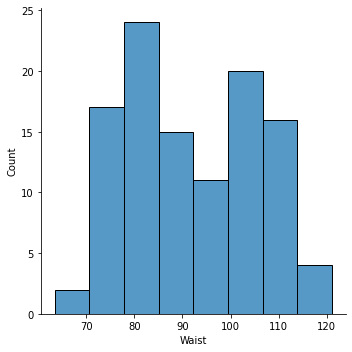

In [6]:
sn.displot(data['Waist'])

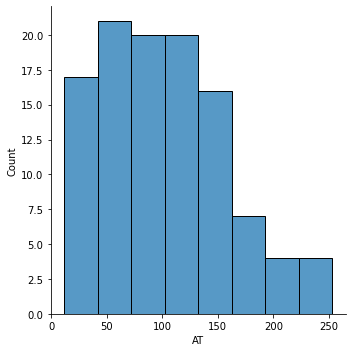

In [7]:
sn.displot(data['AT'])

<AxesSubplot:xlabel='Waist', ylabel='AT'>

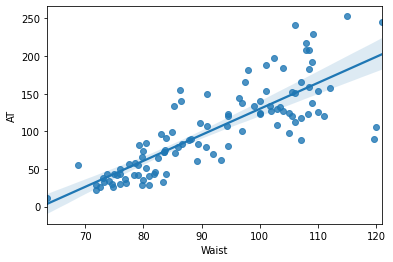

In [8]:
sn.regplot(x="Waist",y="AT",data=data)

In [9]:
import statsmodels.formula.api as smf
model=smf.ols("Waist~AT",data=data).fit()

In [10]:
#coefficients
model.params

Intercept    72.163315
AT            0.193716
dtype: float64

In [11]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept    47.025363
AT           14.740376
dtype: float64 
 Intercept    2.697170e-73
AT           1.618607e-27
dtype: float64


In [12]:
# R squared values and R squared adj values
(model.rsquared,model.rsquared_adj)

(0.6700368930528429, 0.6669531256981966)

In [13]:
#prediction for 50 and 100 waist column
newdata=pd.DataFrame([50,100])

In [14]:
data_pred=pd.DataFrame(newdata,columns=['AT'])


In [15]:
model.predict(data_pred)

0   NaN
1   NaN
dtype: float64

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Waist   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.62e-27
Time:                        19:36:05   Log-Likelihood:                -377.90
No. Observations:                 109   AIC:                             759.8
Df Residuals:                     107   BIC:                             765.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.1633      1.535     47.025      0.000      69.121      75.205
AT             0.1937      0.013     14.740      0.000       0.168       0.220
==============================================================================
Omnibus:                       24.032   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.106
Skew:                           1.014   Prob(JB):                     8.76e-09
Kurtosis:                       5.015   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""